In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakshamsaxena20","key":"2548054b2f53b5bb84d76a3e8f9dfaeb"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18661  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11331  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5816  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3979  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
!kaggle datasets download -d plhalvorsen/kvasir-v2-a-gastrointestinal-tract-dataset

100% 2.32G/2.32G [00:46<00:00, 96.9MB/s]
100% 2.32G/2.32G [00:46<00:00, 53.6MB/s]


In [ ]:
!unzip kvasir-v2-a-gastrointestinal-tract-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: normal-cecum/normal-cecum/00b1b20b-ce2b-449c-93fc-6df854e3ab33.jpg  
  inflating: normal-cecum/normal-cecum/00b99f19-2c31-4c7c-931a-4c3b38d70d1a.jpg  
  inflating: normal-cecum/normal-cecum/00f3d2cc-93ea-40f0-9b88-b159b07a49cb.jpg  
  inflating: normal-cecum/normal-cecum/0111fb06-3113-4abf-9050-7bfb8d4688f5.jpg  
  inflating: normal-cecum/normal-cecum/0163b3a2-9aa1-4b23-a9a8-aff07a738f16.jpg  
  inflating: normal-cecum/normal-cecum/0191eafd-0367-4772-9181-296b80dbf917.jpg  
  inflating: normal-cecum/normal-cecum/01af3454-037f-4708-b73c-6ec4423b6a61.jpg  
  inflating: normal-cecum/normal-cecum/01b9de1c-1481-4056-b27a-4d8fa09da06f.jpg  
  inflating: normal-cecum/normal-cecum/01bddb73-9c5d-4ac0-8b25-cc7524b7d191.jpg  
  inflating: normal-cecum/normal-cecum/01c48bf5-3f79-45dd-9390-add72a6da946.jpg  
  inflating: normal-cecum/normal-cecum/01c49663-9674-44ae-b61e-05243a30e4ab.jpg  
  inflating: normal-cecum/normal-cecum/01c6ae3a

In [ ]:
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing.image import ImageDataGenerator
from keras.models import sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

import math 
import shutil
import glob

In [ ]:
base1_dir = '/content/Kvasir2-data/'
os.mkdir(base1_dir)

In [ ]:
train1_dir = os.path.join(base1_dir,'train')
os.mkdir(train1_dir)

validation1_dir = os.path.join(base1_dir,'validation')
os.mkdir(validation1_dir)

test_dir = os.path.join(base1_dir,'test')
os.mkdir(test_dir)

train_DyedLiftedPolyps_dir = os.path.join(train1_dir,'dyed-lifted-polyps')
os.mkdir(train_DyedLiftedPolyps_dir)
train_DyedResectionMargins_dir = os.path.join(train1_dir,'dyed-resection-margins')
os.mkdir(train_DyedResectionMargins_dir)
train_Esophagitis_dir = os.path.join(train1_dir,'esophagitis')
os.mkdir(train_Esophagitis_dir)
train_NormalCecum_dir = os.path.join(train1_dir,'normal-cecum')
os.mkdir(train_NormalCecum_dir)
train_NormalPylorus_dir = os.path.join(train1_dir,'normal-pylorus')
os.mkdir(train_NormalPylorus_dir)
train_NormalZLine_dir = os.path.join(train1_dir,'normal-z-line')
os.mkdir(train_NormalZLine_dir)
train_Polyps_dir = os.path.join(train1_dir,'polyps')
os.mkdir(train_Polyps_dir)
train_UlcerativeColitis_dir = os.path.join(train1_dir,'ulcerative-colitis')
os.mkdir(train_UlcerativeColitis_dir)

validation_DyedLiftedPolyps_dir = os.path.join(validation1_dir,'dyed-lifted-polyps')
os.mkdir(validation_DyedLiftedPolyps_dir)
validation_DyedResectionMargins_dir = os.path.join(validation1_dir,'dyed-resection-margins')
os.mkdir(validation_DyedResectionMargins_dir)
validation_Esophagitis_dir = os.path.join(validation1_dir,'esophagitis')
os.mkdir(validation_Esophagitis_dir)
validation_NormalCecum_dir = os.path.join(validation1_dir,'normal-cecum')
os.mkdir(validation_NormalCecum_dir)
validation_NormalPylorus_dir = os.path.join(validation1_dir,'normal-pylorus')
os.mkdir(validation_NormalPylorus_dir)
validation_NormalZLine_dir = os.path.join(validation1_dir,'normal-z-line')
os.mkdir(validation_NormalZLine_dir)
validation_Polyps_dir = os.path.join(validation1_dir,'polyps')
os.mkdir(validation_Polyps_dir)
validation_UlcerativeColitis_dir = os.path.join(validation1_dir,'ulcerative-colitis')
os.mkdir(validation_UlcerativeColitis_dir)

test_DyedLiftedPolyps_dir = os.path.join(test_dir,'dyed-lifted-polyps')
os.mkdir(test_DyedLiftedPolyps_dir)
test_DyedResectionMargins_dir = os.path.join(test_dir,'dyed-resection-margins')
os.mkdir(test_DyedResectionMargins_dir)
test_Esophagitis_dir = os.path.join(test_dir,'esophagitis')
os.mkdir(test_Esophagitis_dir)
test_NormalCecum_dir = os.path.join(test_dir,'normal-cecum')
os.mkdir(test_NormalCecum_dir)
test_NormalPylorus_dir = os.path.join(test_dir,'normal-pylorus')
os.mkdir(test_NormalPylorus_dir)
test_NormalZLine_dir = os.path.join(test_dir,'normal-z-line')
os.mkdir(test_NormalZLine_dir)
test_Polyps_dir = os.path.join(test_dir,'polyps')
os.mkdir(test_Polyps_dir)
test_UlcerativeColitis_dir = os.path.join(test_dir,'ulcerative-colitis')
os.mkdir(test_UlcerativeColitis_dir)



In [ ]:
import random

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  valid_length = int(len(files) - training_length)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  valid_set = shuffled_set[training_length:]
  testing_set = shuffled_set[training_length:]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file,destination)

  for filename in valid_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file,destination)

  for filename in testing_set:
    this_file = SOURCE + filename
    destination = TESTING + filename
    copyfile(this_file,destination)

In [ ]:
DYEDLIFTEDPOLYPS_SOURCE_DIR = '/content/dyed-lifted-polyps/dyed-lifted-polyps/'
TRAINING_DYEDLIFTEDPOLYPS_DIR = '/content/Kvasir2-data/train/dyed-lifted-polyps/'
VALID_DYEDLIFTEDPOLYPS_DIR = '/content/Kvasir2-data/validation/dyed-lifted-polyps/'
TESTING_DYEDLIFTEDPOLYPS_DIR = '/content/Kvasir2-data/test/dyed-lifted-polyps/'

DYEDRESECTIONMARGINS_SOURCE_DIR = '/content/dyed-resection-margins/dyed-resection-margins/'
TRAINING_DYEDRESECTIONMARGINS_DIR = '/content/Kvasir2-data/train/dyed-resection-margins/'
VALID_DYEDRESECTIONMARGINS_DIR = '/content/Kvasir2-data/validation/dyed-resection-margins/'
TESTING_DYEDRESECTIONMARGINS_DIR = '/content/Kvasir2-data/test/dyed-resection-margins/'

ESOPHAGITIS_SOURCE_DIR = '/content/esophagitis/esophagitis/'
TRAINING_ESOPHAGITIS_DIR = '/content/Kvasir2-data/train/esophagitis/'
VALID_ESOPHAGITIS_DIR = '/content/Kvasir2-data/validation/esophagitis/'
TESTING_ESOPHAGITIS_DIR = '/content/Kvasir2-data/test/esophagitis/'

NORMALCECUM_SOURCE_DIR = '/content/normal-cecum/normal-cecum/'
TRAINING_NORMALCECUM_DIR = '/content/Kvasir2-data/train/normal-cecum/'
VALID_NORMALCECUM_DIR = '/content/Kvasir2-data/validation/normal-cecum/'
TESTING_NORMALCECUM_DIR = '/content/Kvasir2-data/test/normal-cecum/'

NORMALPYLORUS_SOURCE_DIR = '/content/normal-pylorus/normal-pylorus/'
TRAINING_NORMALPYLORUS_DIR = '/content/Kvasir2-data/train/normal-pylorus/'
VALID_NORMALPYLORUS_DIR = '/content/Kvasir2-data/validation/normal-pylorus/'
TESTING_NORMALPYLORUS_DIR = '/content/Kvasir2-data/test/normal-pylorus/'

NORMALZLINE_SOURCE_DIR = '/content/normal-z-line/normal-z-line/'
TRAINING_NORMALZLINE_DIR = '/content/Kvasir2-data/train/normal-z-line/'
VALID_NORMALZLINE_DIR = '/content/Kvasir2-data/validation/normal-z-line/'
TESTING_NORMALZLINE_DIR = '/content/Kvasir2-data/test/normal-z-line/'

POLYPS_SOURCE_DIR = '/content/polyps/polyps/'
TRAINING_POLYPS_DIR = '/content/Kvasir2-data/train/polyps/'
VALID_POLYPS_DIR = '/content/Kvasir2-data/validation/polyps/'
TESTING_POLYPS_DIR = '/content/Kvasir2-data/test/polyps/'

ULCERATIVECOLITIS_SOURCE_DIR = '/content/ulcerative-colitis/ulcerative-colitis/'
TRAINING_ULCERATIVECOLITIS_DIR = '/content/Kvasir2-data/train/ulcerative-colitis/'
VALID_ULCERATIVECOLITIS_DIR = '/content/Kvasir2-data/validation/ulcerative-colitis/'
TESTING_ULCERATIVECOLITIS_DIR = '/content/Kvasir2-data/test/ulcerative-colitis/'

In [ ]:
import os
import random
from shutil import copyfile


SPLIT_SIZE = .85

split_data(DYEDLIFTEDPOLYPS_SOURCE_DIR, TRAINING_DYEDLIFTEDPOLYPS_DIR, VALID_DYEDLIFTEDPOLYPS_DIR, TESTING_DYEDLIFTEDPOLYPS_DIR, SPLIT_SIZE)
split_data(DYEDRESECTIONMARGINS_SOURCE_DIR, TRAINING_DYEDRESECTIONMARGINS_DIR, VALID_DYEDRESECTIONMARGINS_DIR, TESTING_DYEDRESECTIONMARGINS_DIR, SPLIT_SIZE)
split_data(ESOPHAGITIS_SOURCE_DIR, TRAINING_ESOPHAGITIS_DIR, VALID_ESOPHAGITIS_DIR, TESTING_ESOPHAGITIS_DIR, SPLIT_SIZE)
split_data(NORMALCECUM_SOURCE_DIR, TRAINING_NORMALCECUM_DIR, VALID_NORMALCECUM_DIR, TESTING_NORMALCECUM_DIR, SPLIT_SIZE)
split_data(NORMALPYLORUS_SOURCE_DIR, TRAINING_NORMALPYLORUS_DIR, VALID_NORMALPYLORUS_DIR, TESTING_NORMALPYLORUS_DIR, SPLIT_SIZE)
split_data(NORMALZLINE_SOURCE_DIR, TRAINING_NORMALZLINE_DIR, VALID_NORMALZLINE_DIR, TESTING_NORMALZLINE_DIR, SPLIT_SIZE)
split_data(POLYPS_SOURCE_DIR, TRAINING_POLYPS_DIR, VALID_POLYPS_DIR, TESTING_POLYPS_DIR, SPLIT_SIZE)
split_data(ULCERATIVECOLITIS_SOURCE_DIR, TRAINING_ULCERATIVECOLITIS_DIR, VALID_ULCERATIVECOLITIS_DIR, TESTING_ULCERATIVECOLITIS_DIR, SPLIT_SIZE)

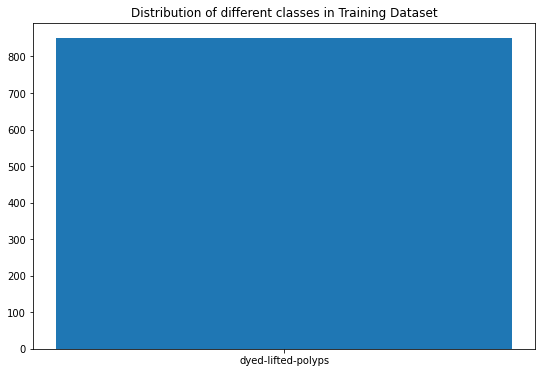

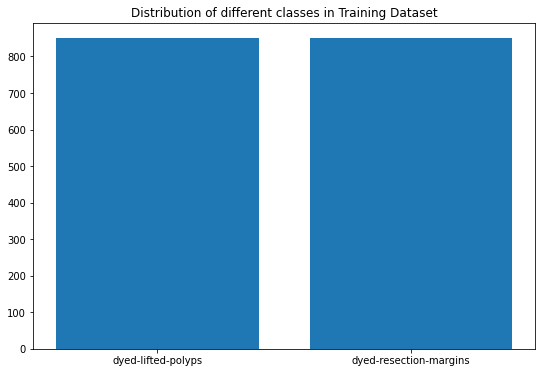

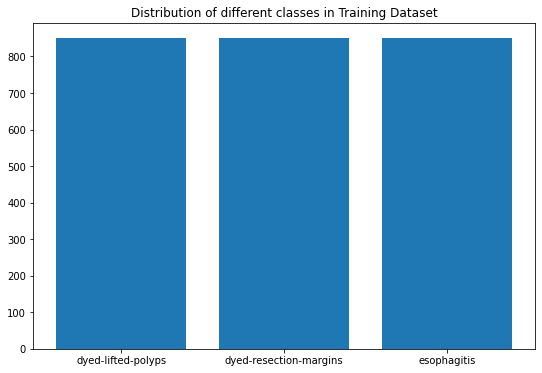

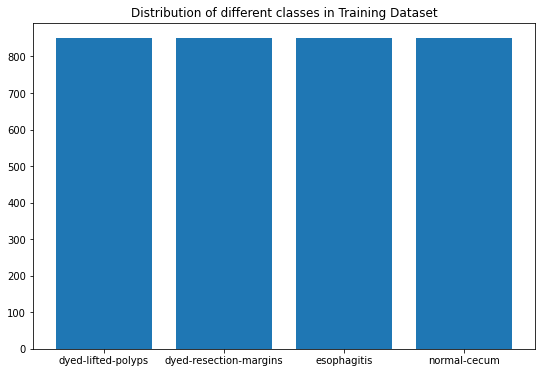

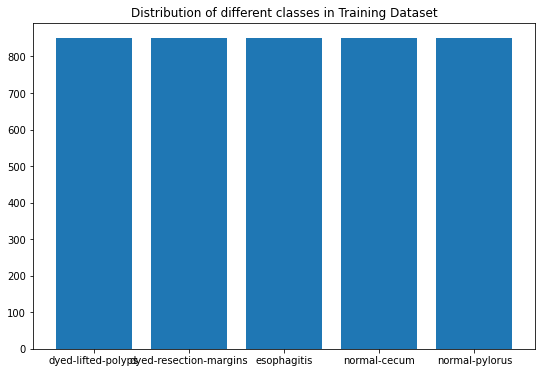

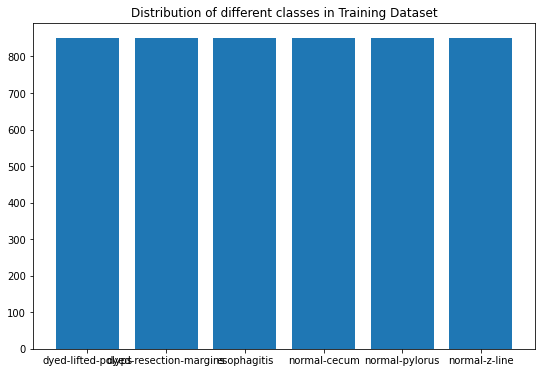

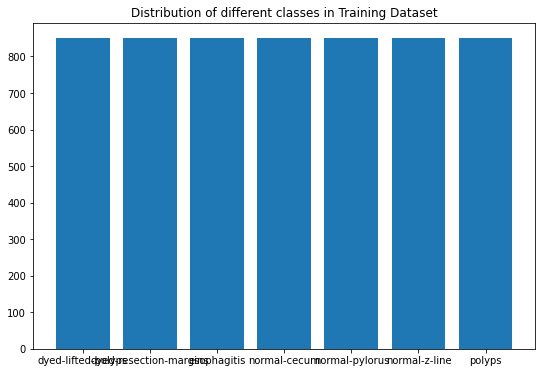

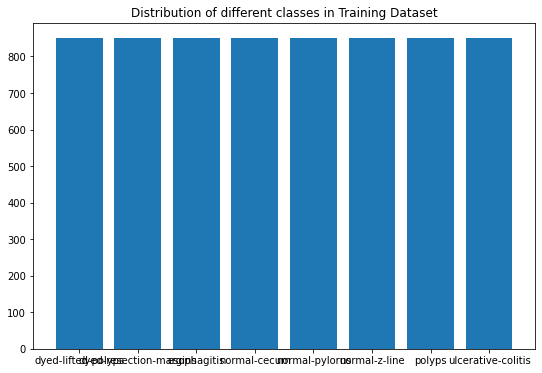

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
nimgs = {}
for i in image_folder:
  nimages = len(os.listdir('/content/Kvasir2-data/train/'+i+'/'))
  nimgs[i]=nimages
  plt.figure(figsize=(9, 6))
  plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
  plt.xticks(range(len(nimgs)), list(nimgs.keys()))
  plt.title('Distribution of different classes in Training Dataset')
  plt.show()

In [ ]:
for i in ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']:
  print('Training {} images are: '.format(i)+str(len(os.listdir('/content/Kvasir2-data/train/'+i+'/'))))

Training dyed-lifted-polyps images are: 850
Training dyed-resection-margins images are: 850
Training esophagitis images are: 850
Training normal-cecum images are: 850
Training normal-pylorus images are: 850
Training normal-z-line images are: 850
Training polyps images are: 850
Training ulcerative-colitis images are: 850


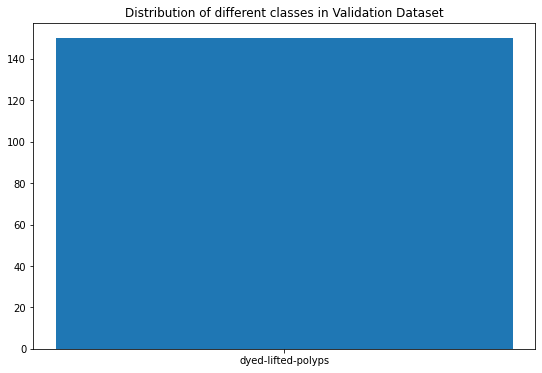

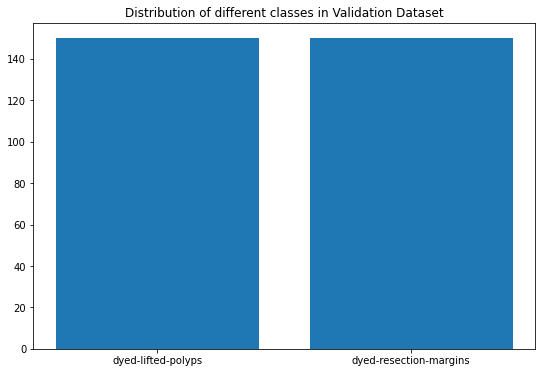

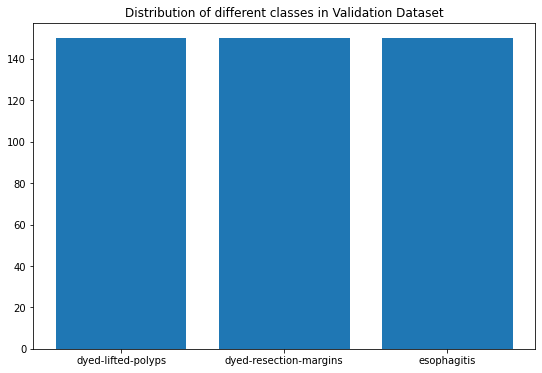

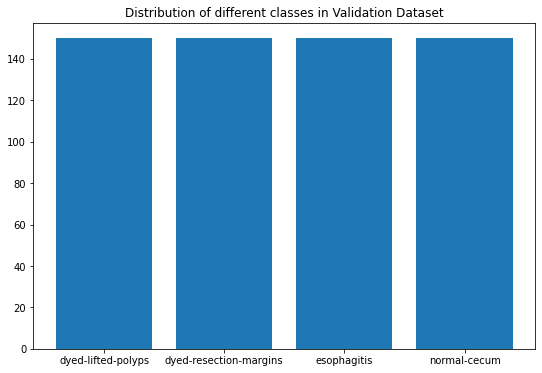

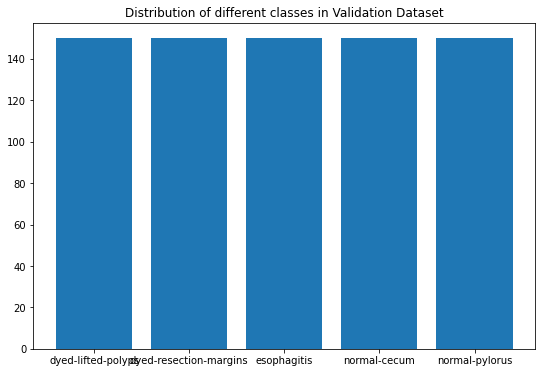

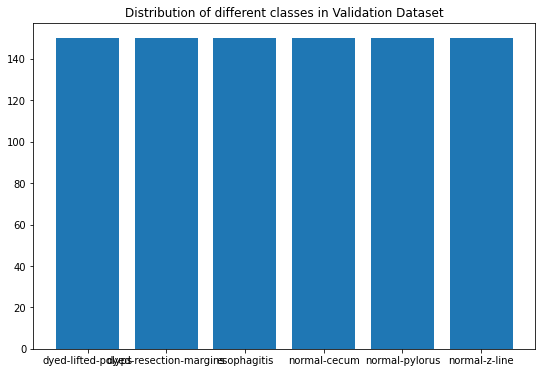

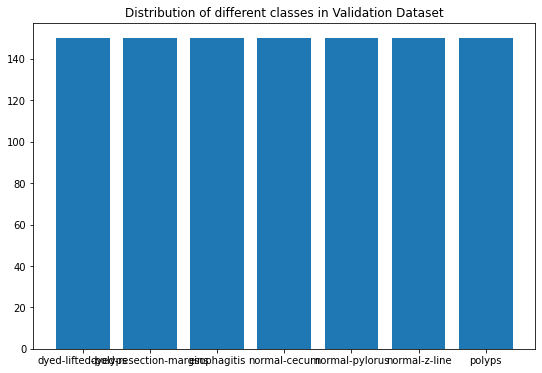

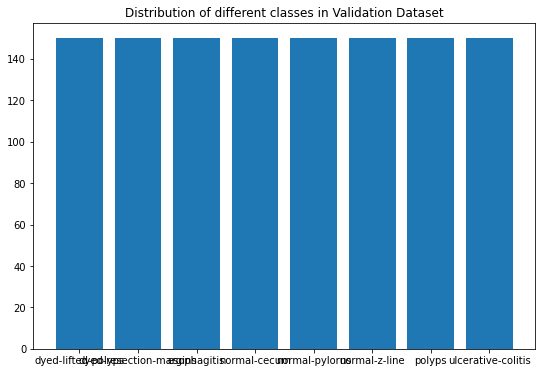

In [ ]:
image_folder = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
nimgs = {}
for i in image_folder:
  nimages = len(os.listdir('/content/Kvasir2-data/validation/'+i+'/'))
  nimgs[i]=nimages
  plt.figure(figsize=(9, 6))
  plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
  plt.xticks(range(len(nimgs)), list(nimgs.keys()))
  plt.title('Distribution of different classes in Validation Dataset')
  plt.show()

In [ ]:
for i in ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']:
  print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/Kvasir2-data/validation/'+i+'/'))))

Valid dyed-lifted-polyps images are: 150
Valid dyed-resection-margins images are: 150
Valid esophagitis images are: 150
Valid normal-cecum images are: 150
Valid normal-pylorus images are: 150
Valid normal-z-line images are: 150
Valid polyps images are: 150
Valid ulcerative-colitis images are: 150


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=32

In [ ]:
TRAINING_DIR = '/content/Kvasir2-data/train/'
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=45,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 6800 images belonging to 8 classes.


In [ ]:
VALIDATION_DIR = '/content/Kvasir2-data/validation/'
validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1200 images belonging to 8 classes.


In [ ]:
TESTING_DIR = '/content/Kvasir2-data/test/'
test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1200 images belonging to 8 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = '/content/CNN_aug_best_weigths.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose=1, save_best_only = True)

In [ ]:
model = Sequential([
   Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2,2),
   Conv2D(32, (3,3), activation='relu'), MaxPooling2D(2,2),
   Conv2D(64, (3,3), activation='relu'),
   Conv2D(64, (3,3), activation='relu'),
   MaxPooling2D(2,2),
   Conv2D(128, (3,3), activation='relu'),
   Conv2D(128, (3,3), activation='relu'),
   MaxPooling2D(2,2), 
   Conv2D(256, (3,3), activation='relu'),
   Conv2D(256, (3,3), activation='relu'),
   Conv2D(256, (3,3), activation='relu'),
   MaxPooling2D(2,2),
   Flatten(),
   Dense(512, activation='relu'),
   Dense(512, activation='relu'),
   Dense(8, activation='softmax'),        
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,epochs=10,verbose=1,validation_data=validation_generator,callbacks = [best_model])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
213/213 [==============================] - 242s 1s/step - loss: 1.4511 - accuracy: 0.3485 - val_loss: 1.0501 - val_accuracy: 0.4725
Epoch 2/10
213/213 [==============================] - 229s 1s/step - loss: 1.0526 - accuracy: 0.4887 - val_loss: 1.0279 - val_accuracy: 0.4333
Epoch 3/10
213/213 [==============================] - 228s 1s/step - loss: 0.9865 - accuracy: 0.5281 - val_loss: 0.8859 - val_accuracy: 0.5950
Epoch 4/10
213/213 [==============================] - 224s 1s/step - loss: 0.9181 - accuracy: 0.5547 - val_loss: 1.0553 - val_accuracy: 0.5467
Epoch 5/10
213/213 [==============================] - 225s 1s/step - loss: 0.8775 - accuracy: 0.5729 - val_loss: 0.8703 - val_accuracy: 0.5942
Epoch 6/10
213/213 [==============================] - 224s 1s/step - loss: 0.8199 - accuracy: 0.6087 - val_loss: 0.8415 - val_accuracy: 0.6317
Epoch 7/10
213/213 [==============================] - 223s 1s/step - loss: 0.8334 - accuracy: 0.6103 - val_loss: 0.8265 - val_accuracy: 0.6192

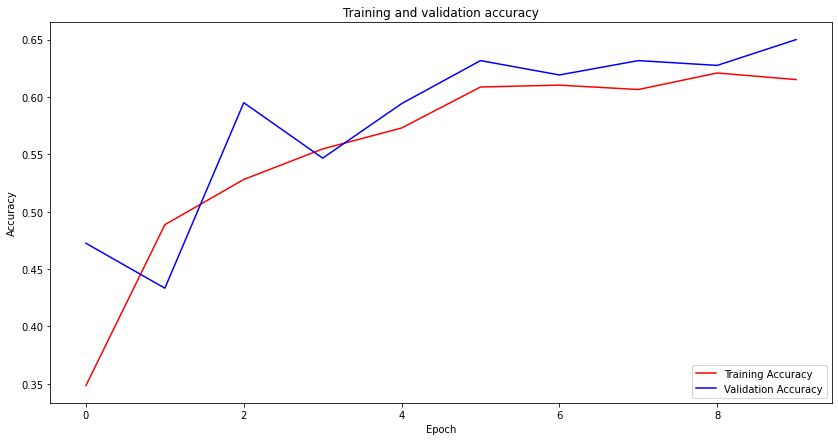

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

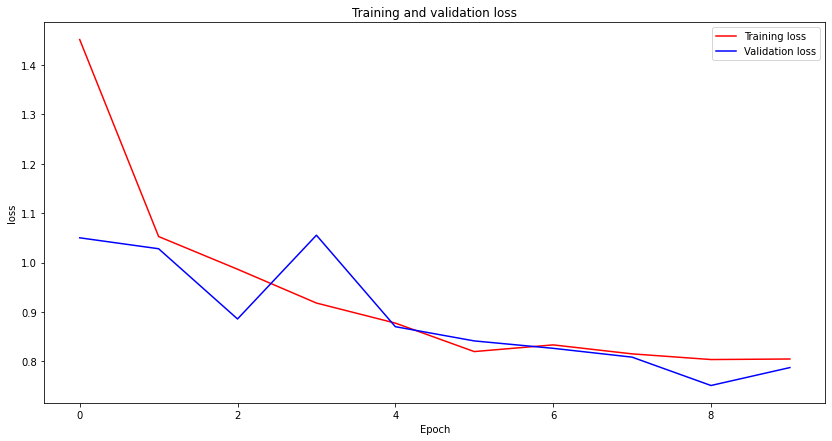

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save("./model.h5")

In [ ]:
from keras.models import load_model
model = load_model("/content/model.h5")

In [ ]:
!pip install gradio

     |████████████████████████████████| 865 kB 12.2 MB/s 
     |████████████████████████████████| 2.0 MB 51.1 MB/s 
     |████████████████████████████████| 210 kB 50.4 MB/s 
     |████████████████████████████████| 856 kB 48.0 MB/s 
     |████████████████████████████████| 61 kB 433 kB/s 
     |████████████████████████████████| 3.6 MB 52.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=4819c6b5c3d9e5143fbdd6802b9222090082840391d82c6dd8a5c1387ffefdd7
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3373 sha256=a485ca01203272370f1d1d7b2c1f64c66e8719fd1031c6f2b17df3295732eedd
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [41]:
import gradio as gr
import tensorflow as tf
import requests

inception_net = tf.keras.applications.MobileNetV2() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://github.com/sakshamsaxena20/kvasir.git")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=[
  ["images/cheetah1.jpg"], ["images/lion.jpg"]]).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://48693.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://48693.gradio.app')